<a href="https://colab.research.google.com/github/Yurihc001/OpenCV.ipynb/blob/main/Vis%C3%A3o_Computacional_usando_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Visão Computacional usando OpenCV**
Rodrigo Plotze

#Fundamentos

In [ ]:
# Imagens de Teste
!wget "https://www.ime.usp.br/~yoshi/2015ii/ccm118/sandbox/2015.10.14/Data/peppers.jpg"
!wget "https://www.ime.usp.br/~yoshi/2015ii/ccm118/sandbox/2015.10.14/Data/mandrill.jpg"

!wget "https://links.uwaterloo.ca/Repository/TIF/tulips.tif"
!wget "https://links.uwaterloo.ca/Repository/TIF/sail.tif"

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# carregar a imagem -> BGR
img1 = cv.imread('peppers.jpg')

# converter a imagem BGR para RGB
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)


# converter a imagem GRAY para Preto/Branco (Binária)
th, img3 = cv.threshold(img2, 128, 255, cv.THRESH_BINARY)

#
# Propriedades da imagem
#
print(img1.shape)     # (largura, altura, número de canais)
print(img2.shape)
print('Total de pixels = %d' %img1.size)

# visualizar a imagem
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(img1), plt.axis('off'), plt.title('colorida')
plt.subplot(132), plt.imshow(img2, cmap='gray'), plt.axis('off'), plt.title('tons cinza')
plt.subplot(133), plt.imshow(img3, cmap='binary'), plt.axis('off'), plt.title('binária')
plt.show()


#Operações Pontuais

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('tulips.tif')
img2 = cv.imread('sail.tif')

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)


#
# OPERAÇÕES PONTUAIS
#
img3 = cv.add(img1, 60)       # adicionar o valor 60 a cada pixel da imagem
img4 = cv.bitwise_not(img1)   # negação
img5 = cv.addWeighted(img1,0.50,img2,0.50,0)



plt.figure(figsize=(25,15))
plt.subplot(241), plt.imshow(img1), plt.axis('off'), plt.title('original')
plt.subplot(242), plt.imshow(img3), plt.axis('off'), plt.title('adição')
plt.subplot(243), plt.imshow(img4), plt.axis('off'), plt.title('negação')
plt.subplot(244), plt.imshow(img5), plt.axis('off'), plt.title('img1+img2')
plt.show()


# Filtros Digitais

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img1 = cv.imread('peppers.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

# Filtro Passa-Baixa (suavização)
img2 = cv.blur(img1, (5,5))
img3 = cv.medianBlur(img1, 15)
img4 = cv.GaussianBlur(img1, (5,5), 0)

# Filtro Passa-Alta (realce)
mask = np.array( [[0,-1,0],[-1,5,-1],[0,-1, 0]])
img5 = cv.filter2D(img1,-1,mask)

mask = np.array( [[-1,-1,-1],[-1,9,-1],[-1,-1, -1]])
img6 = cv.filter2D(img1,-1,mask)

plt.figure(figsize=(15,8))
plt.subplot(231), plt.imshow(img1), plt.axis('off'), plt.title('original')
plt.subplot(232), plt.imshow(img2), plt.axis('off'), plt.title('blur')
plt.subplot(233), plt.imshow(img3), plt.axis('off'), plt.title('medianBlur')
plt.subplot(234), plt.imshow(img4), plt.axis('off'), plt.title('GaussianBlur')
plt.subplot(235), plt.imshow(img5), plt.axis('off'), plt.title('realce')
plt.subplot(236), plt.imshow(img6), plt.axis('off'), plt.title('realce')
plt.show()


#Detectores de Borda

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('peppers.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

# Canny
img2 = cv.Canny(img1, 40, 180)
img2 = cv.bitwise_not(img2)

plt.figure(figsize=(15,8))
plt.subplot(121), plt.imshow(img1, cmap='gray'), plt.axis('off'), plt.title('original')
plt.subplot(122), plt.imshow(img2, cmap='gray'), plt.axis('off'), plt.title('canny')
plt.show()

#Segmentação por Cor

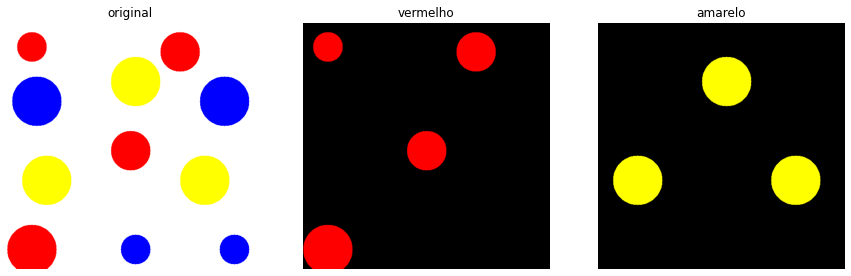

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def segmentar(img, mask):
  a = img.copy()
  a[:,:,0] = mask
  a[:,:,1] = mask
  a[:,:,2] = mask
  a = cv.bitwise_and(img,a)
  return a


# Imagem artificial de 500x500 com 3 canais
img1 = np.ones((500,500,3),np.uint8)*255
img1 = cv.circle(img1, (50,50), 30, (255,0,0), -1)
img1 = cv.circle(img1, (350,60), 40, (255,0,0), -1)
img1 = cv.circle(img1, (50,460), 50, (255,0,0), -1)
img1 = cv.circle(img1, (250,260), 40, (255,0,0), -1)
img1 = cv.circle(img1, (260,460), 30, (0,0,255), -1)
img1 = cv.circle(img1, (440,160), 50, (0,0,255), -1)
img1 = cv.circle(img1, (60,160), 50, (0,0,255), -1)
img1 = cv.circle(img1, (260,120), 50, (255,255,0), -1)
img1 = cv.circle(img1, (400,320), 50, (255,255,0), -1)
img1 = cv.circle(img1, (80,320), 50, (255,255,0), -1)
img1 = cv.circle(img1, (460,460), 30, (0,0,255), -1)


# Converter RGB para HSV
img2 = cv.cvtColor(img1, cv.COLOR_RGB2HSV)


# Segmentação dos pixels do intervalor VERMELHO
ini = np.array( [0, 120, 80])
fim = np.array( [20, 255, 255])
mask = cv.inRange(img2, ini, fim)
imgr = segmentar(img2, mask)
imgr = cv.cvtColor(imgr, cv.COLOR_HSV2RGB)

# Segmentação dos pixels do intervalor AMARELO
ini = np.array( [30, 120, 80])
fim = np.array( [60, 255, 255])
mask = cv.inRange(img2, ini, fim)
imga = segmentar(img2, mask)
imga = cv.cvtColor(imga, cv.COLOR_HSV2RGB)

plt.figure(figsize=(15,12))
plt.subplot(131), plt.imshow(img1), plt.axis('off'), plt.title('original')
plt.subplot(132), plt.imshow(imgr), plt.axis('off'), plt.title('vermelho')
plt.subplot(133), plt.imshow(imga), plt.axis('off'), plt.title('amarelo')
plt.show()
